Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.

"Objective:" Use a deep convolutional neural network to perform facial recognition using Keras.

ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.


Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

In [1]:
#1. Input the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#2. Load the dataset after loading the dataset, you have to normalize every image.
data = np.load("ORL_faces.npz")
x_train = data["trainX"]
x_test = data["testX"]
y_train = data["trainY"]
y_test = data["testY"]



x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
print('Training dataset shape: ',x_train.shape)
print('Testing dataset shape: ',x_test.shape)

Training dataset shape:  (240, 10304)
Testing dataset shape:  (160, 10304)


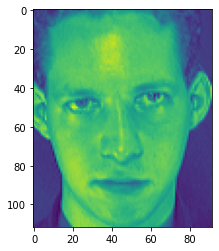

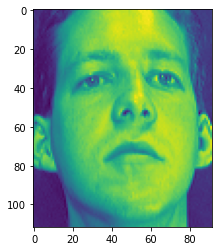

In [3]:
c=x_train[2].reshape(112,92)
plt.imshow(c)
plt.show()
d=x_test[2].reshape(112,92)
plt.imshow(d)

In [4]:
#3.Split the dataset
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.03, random_state=42)

In [5]:
#4.Transform the images to equal sizes to feed in CNN
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#changing the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape[0]))

x_train shape: 232
x_test shape: 160


In [6]:
#5.Build a CNN model that has 3 main layers:
    #i. Convolutional Layer 
    #ii. Pooling Layer 
    #iii. Fully Connected Layer 

    

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

In [8]:
#6.Train the model
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=150, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/150
1/1 - 0s - loss: 3.0063 - accuracy: 0.0560 - val_loss: 2.9786 - val_accuracy: 0.0000e+00
Epoch 2/150
1/1 - 0s - loss: 2.9964 - accuracy: 0.0991 - val_loss: 2.9786 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 - 0s - loss: 2.9894 - accuracy: 0.0819 - val_loss: 2.9963 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 - 0s - loss: 3.0008 - accuracy: 0.0603 - val_loss: 3.0079 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 - 0s - loss: 3.0042 - accuracy: 0.0560 - val_loss: 3.0160 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 - 0s - loss: 2.9876 - accuracy: 0.0776 - val_loss: 3.0231 - val_accuracy: 0.0000e+00
Epoch 7/150
1/1 - 0s - loss: 3.0016 - accuracy: 0.0560 - val_loss: 3.0309 - val_accuracy: 0.0000e+00
Epoch 8/150
1/1 - 0s - loss: 3.0059 - accuracy: 0.0647 - val_loss: 3.0333 - val_accuracy: 0.0000e+00
Epoch 9/150
1/1 - 0s - loss: 3.0051 - accuracy: 0.0603 - val_loss: 3.0355 - val_accuracy: 0.0000e+00
Epoch 10/150
1/1 - 0s - loss: 2.9954 - accuracy: 0.0345 - val_loss: 3.0328 - val_accuracy: 

In [9]:
s = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)
print("Test loss",s[0]*100)
print("Test Accuracy",s[1]*100)

Test loss 27.34520435333252
Test Accuracy 94.37500238418579


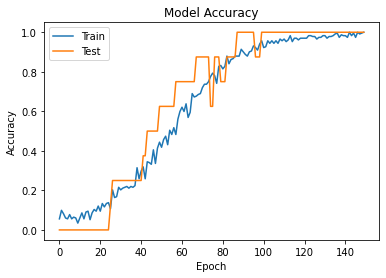

In [10]:
# Model Accuracy is above 90%
#7.Plot the result
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

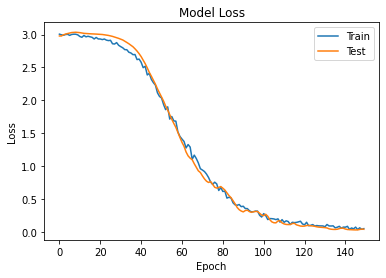

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()